In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#look at what type of people survival 

In [3]:
tit = pd.read_csv("titanic.csv")

In [4]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#handle null values
tit.dropna(inplace=True)

In [7]:
tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
#handle outliers
#look at the columns that are important for the project

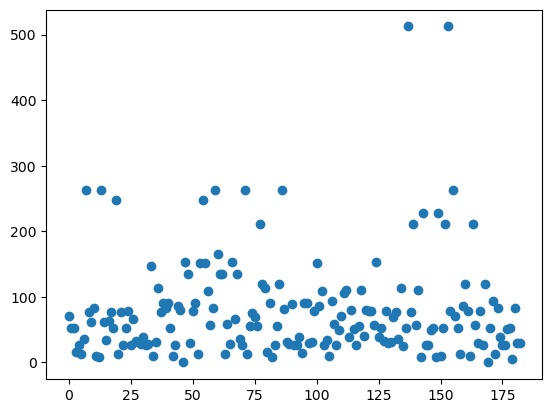

In [12]:
#len is a function that gives the length
#range is also a function 
plt.scatter([x for x in range(len(tit))], tit["Fare"])

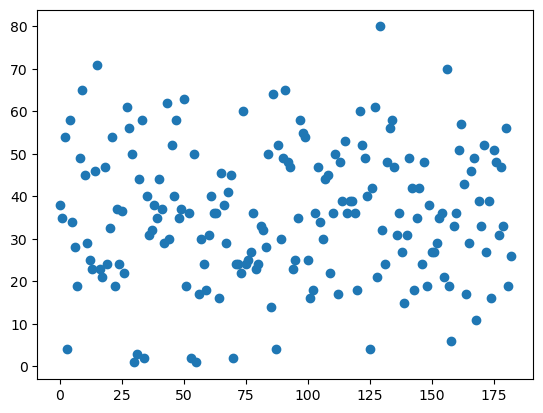

In [14]:
plt.scatter([x for x in range(len(tit))], tit["Age"])

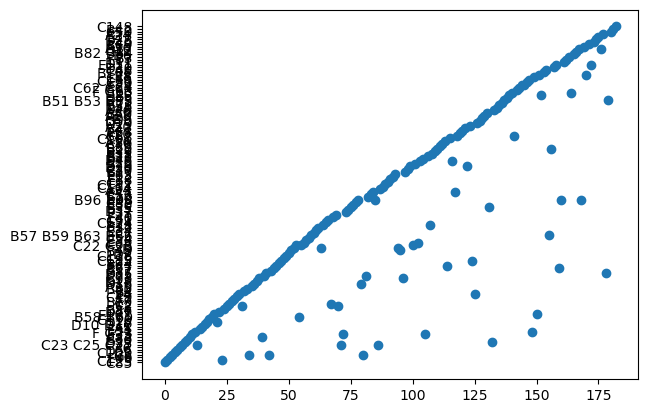

In [15]:
plt.scatter([x for x in range(len(tit))], tit["Cabin"])
#this is a catagorial value not good for scattered plots 

In [ ]:
#catagorial values are specific values (dont look for outliers)
#pie, bar, histogram
# continous values any values 
#line, scattered, distribution

In [ ]:
#both fare and age have outliers

In [16]:
#handle the outliers
from numpy import mean
from numpy import std

In [17]:
tit_mean = mean(tit["Fare"])
tit_std = std(tit['Fare'])

In [18]:
tit_mean

78.68246885245901

In [19]:
tit_std

76.13895628242061

In [20]:
cut_off = tit_std*3

In [21]:
lower = tit_mean-cut_off
upper = tit_mean+ cut_off

In [22]:
outliers = []
for x in tit.Fare:
    if x < lower or x > upper:
        outliers.append(x)

In [23]:
outliers

[512.3292, 512.3292]

In [24]:
print("Total outliers: ", len(outliers))

Total outliers:  2


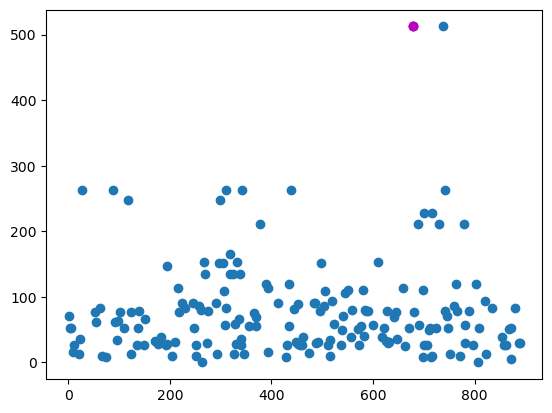

In [28]:
#outliers are the same plotted one on top of other 
#visualize the outlier 
plt.scatter(tit.Fare.index, tit.Fare)

for i in tit.Fare:
    if i in outliers:
        plt.scatter(tit.Fare[tit.Fare==i].index[0], i, c='m')
plt.show()

In [29]:
#dropping the outliers
tit.drop(tit.Fare[tit.Fare < lower].index, inplace=True)
tit.drop(tit.Fare[tit.Fare > upper].index, inplace=True)


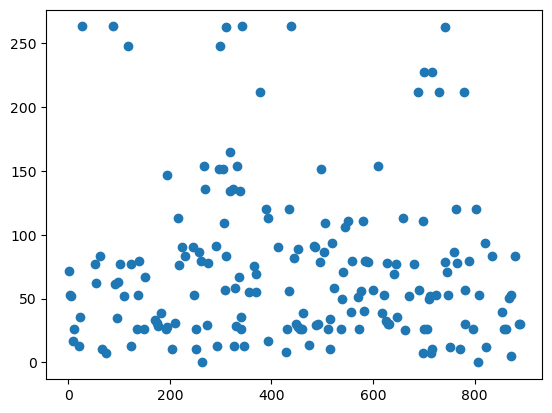

In [30]:
plt.scatter(tit.Fare.index, tit.Fare)

In [31]:
tit_mean = mean(tit["Age"])
tit_std = std(tit['Age'])

In [32]:
tit_mean

35.67635359116022

In [33]:
tit_std

15.686922658852104

In [38]:
cut_off = tit_std*2

In [39]:
lower = tit_mean-cut_off
upper = tit_mean+ cut_off

In [40]:
outliers = []
for x in tit.Age:
    if x < lower or x > upper:
        outliers.append(x)

In [41]:
outliers

[4.0, 71.0, 1.0, 3.0, 2.0, 2.0, 0.92, 2.0, 4.0, 4.0, 80.0, 70.0]

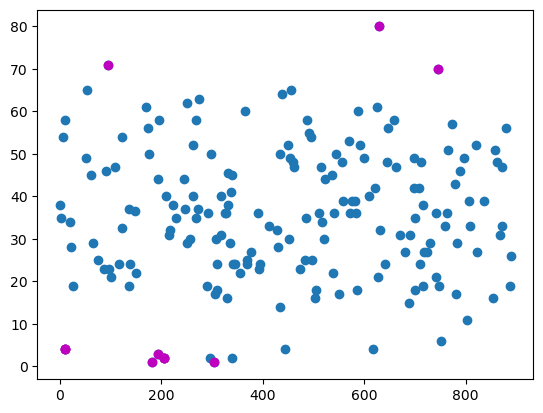

In [42]:
plt.scatter(tit.Age.index, tit.Age)

for i in tit.Age:
    if i in outliers:
        plt.scatter(tit.Age[tit.Age==i].index[0], i, c='m')
plt.show()

In [43]:
tit.drop(tit.Age[tit.Age < lower].index, inplace=True)
tit.drop(tit.Age[tit.Age > upper].index, inplace=True)

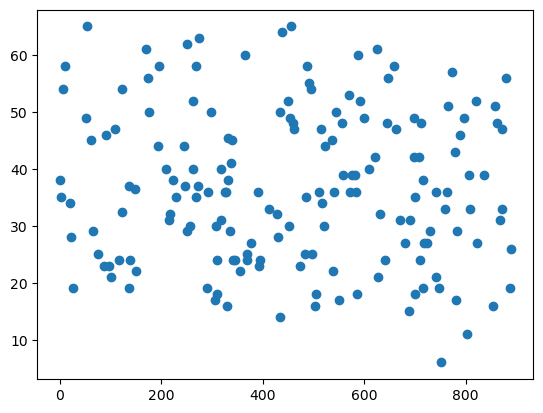

In [44]:
plt.scatter(tit.Age.index, tit.Age)

In [ ]:
#visualizing data to  get more insights 

In [ ]:
#male or female survived?--pie chart
# age of survivers?---historgram
# fare of survivers?---historgram

In [ ]:
#sex vs survived 
#cat vs cat best plot?

<Axes: xlabel='Survived', ylabel='Age'>

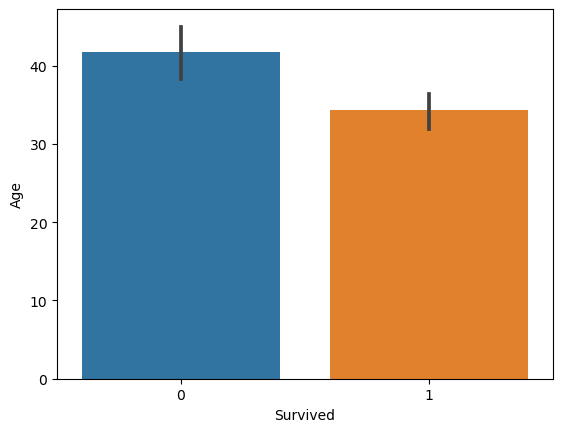

In [53]:
sns.barplot(data =tit, x="Survived", y="Age")

<Axes: xlabel='Age', ylabel='Count'>

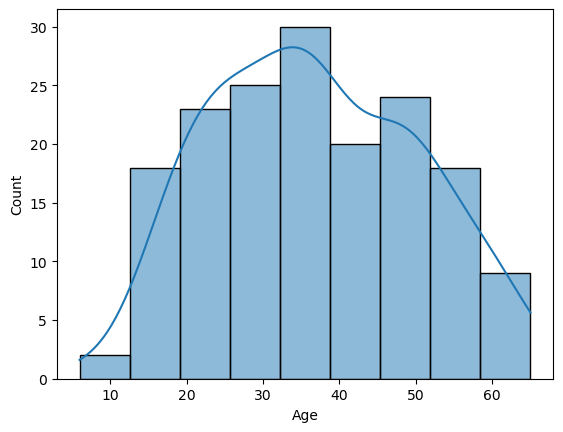

In [55]:
sns.histplot(tit["Age"], kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

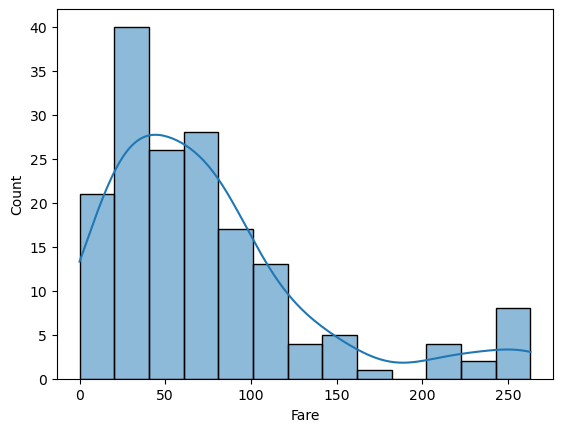

In [56]:
sns.histplot(tit["Fare"], kde=True)

<Axes: xlabel='Survived', ylabel='Fare'>

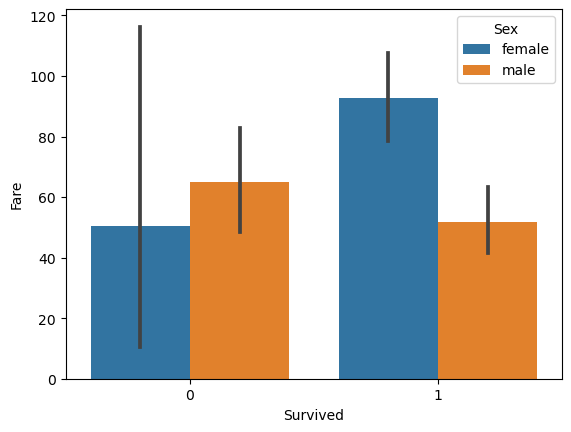

In [58]:
sns.barplot(data= tit, x="Survived", y="Fare", hue="Sex")

<Axes: xlabel='Survived', ylabel='Age'>

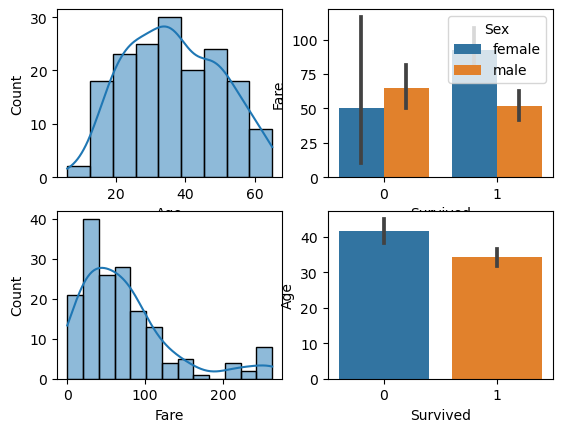

In [59]:
plt.subplot(2,2,1)
sns.histplot(tit["Age"], kde=True)
plt.subplot(2,2,2)
sns.barplot(data= tit, x="Survived", y="Fare", hue="Sex")
plt.subplot(2,2,3)
sns.histplot(tit["Fare"], kde=True)
plt.subplot(2,2,4)
sns.barplot(data =tit, x="Survived", y="Age")


In [60]:
plt.savefig("subplot_display_titanic.jpeg")

<Figure size 640x480 with 0 Axes>

In [ ]:
#WorkFlow(we did the work)
#preprossessing 
#anaylze
#visualize 
#interpret
#display

In [ ]:
#ML(models or machine will do the work)
#i want to make perpectives 
#i want to anayze
# we clean the data and give it to the machine and it will do the workflow for us